In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from get_aq_data import get_flo_data, ID_to_name, TICKS_TWO_HOURLY

In [3]:
data, hourly_mean, daily_mean = get_flo_data()

In [4]:
all_site_mean = data['2019-05-01':].mean(axis=1)

In [5]:
all_site_mean = all_site_mean.to_frame('PM25')

In [6]:
all_site_mean['dow'] = all_site_mean.index.dayofweek

In [7]:
all_site_mean['dow'] = all_site_mean['dow'].replace({0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'})

In [8]:
cat_dtype = pd.CategoricalDtype(categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)

In [9]:
all_site_mean['dow'] = all_site_mean['dow'].astype(cat_dtype)

In [10]:
days = {}
for day in ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']:
    days[day] = all_site_mean[all_site_mean.dow == day]
    days[day] = days[day].groupby(days[day].index.time).mean()
    days[day].columns = [day]

In [11]:
concatted = pd.concat([days[d] for d in days.keys()], axis=1)

In [12]:
sds = {}
for day in ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']:
    sds[day] = all_site_mean[all_site_mean.dow == day]
    sds[day] = sds[day].groupby(sds[day].index.time).std()
    sds[day].columns = [day]

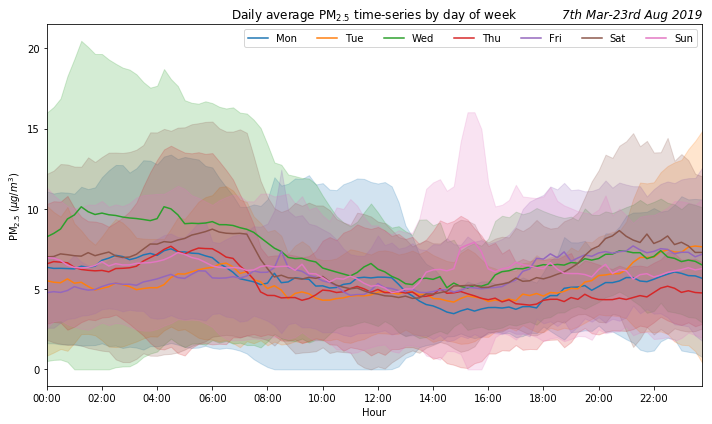

In [13]:
ax = concatted.plot(figsize=(10, 6))
plt.xticks(TICKS_TWO_HOURLY)
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Hour')
plt.title('Daily average $\mathrm{PM}_{2.5}$ time-series by day of week')
plt.title('7th Mar-23rd Aug 2019', loc='right', fontstyle='italic')
plt.legend(ncol=7)
plt.tight_layout()
plt.savefig('graphs/DayOfWeek_TimeSeries.png', dpi=300)
for index, day in enumerate(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']):
    fill_bottom = days[day][day] - sds[day][day]
    fill_bottom[fill_bottom < 0] = 0
    fill_top = days[day][day] + sds[day][day]
    plt.fill_between(days[day][day].index, fill_bottom, fill_top, alpha=0.2, color='C%d' % index)
plt.savefig('graphs/DayOfWeek_TimeSeries_WithUncertainty.png', dpi=300)